## Module 4: *(Template)*

**RENAME THE FILE TO INCLUDE YOUR COMPANY, GROUP NUMBER, AND LAST NAMES**

**E.G. KAMEN1_GROVES_MODULE_4.IPYNB**

## Team Members:
Michael Dornic & Haley Cossman

## Project Title:
SIR Model of Disease Spread


## Project Goal:
This project seeks to... *(what is the purpose of your project -- i.e., describe the question that you seek to answer by analyzing data.)*


## Disease Background:

Middle East respiratory syndrome coronavirus (MERS-CoV)

* Prevalence & incidence

MERS-Cov was first reported in Saudi Arabia in 2012. Since then, around 2600 laboratory-confirmed cases of MERS-CoV have been reported globally since 2012, across 27 countries including 12 countrires in the Middle Eastern region. Of these cases, 948 deaths have been reported.

Source: https://www.emro.who.int/health-topics/mers-cov/mers-outbreaks.html
https://iris.who.int/server/api/core/bitstreams/276466de-a41a-427d-aa42-5d99cd15ecdc/content

* Economic burden

According to a study published on the NLM database, the average cost of managing a MERS case at Saudi hospitals ranged from $1278.41 to $75,987.96 with a mean cost of $12,947.03 ± $19,923.14. Another study pubished on the same database reported that the MERS outbreak in 2015 was correlated "with a reduction of 2.1 million non-citizen visitors corresponding with US $2.6 billion in tourism loss for the ROK [Republic of Korea]."  

Source: https://pmc.ncbi.nlm.nih.gov/articles/PMC6560634/
https://pmc.ncbi.nlm.nih.gov/articles/PMC6844224/

* Risk factors (genetic, lifestyle) & Societal determinants

Risk factors for MERS include old age, previous medical conditions (diabetes, kidney disease, cancer), a weakened immune system, smoking, exposure to camels, and poor hygiene. Societal determinants of MERS infection include socioeconomic status, occupation, location (Saudi Arabia), and access to healthcare.

Source: https://www.medicalnewstoday.com/articles/262538#symptoms
https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-018-5484-8

* Symptoms

Common symptoms of MERS include fever, cough, shortness of breath, diarrhea, nausea, or vomiting. Symptoms usually appear within 6 days of exposure, but some people experience very mild or no symptoms.

Source: https://www.cdc.gov/mers/about/index.html

* Diagnosis

To diagnose MERS, a healthcare provider will perform a normal clinical evaluation (travel history, contact with infected people, camel exposure) and a physical exam. They may also take a chest X-ray, blood tests, or a nasal/throat swab. Normally, MERS is officially diagnosed with a Reverse Transcription Polymerase Chain Reaction test, which detects MERS RNA.

Source: https://www.hopkinsmedicine.org/health/conditions-and-diseases/middle-east-respiratory-syndrome-mers

* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)

Anatomy/Organ Physiology: Targets lower respiratory tract, kidneys, and immune cells via DPP4 receptor. This receptor is found in alveolar epithelial cells, kidney cells, and immune cells, which explains why MERS can cause lung failure.

Cell & Molecular Physiology: Virus binds to DPP4 receptor, viral RNA enters the cytoplasm, replicates, blocks interferons (slow immune response), delays cytokine release, results in damaged lung tissue, cell death, fluid buildup, and organ damage.

Source: https://pmc.ncbi.nlm.nih.gov/articles/PMC7104727/#s0190
https://pmc.ncbi.nlm.nih.gov/articles/PMC7155742/


## Dataset: 

We are using the MERS Outbreaks dataset from 2012-2019, found on Kaggle. Each row contains a report from each region/location per day, while each column represents number of cases per country/region. From the dataset we are only looking at cases in Saudi Arabia to conduct our SIR model. The data is extracted from the World Health Organization. The GitHub repository contains two datasets, one with data unorganized, and a "cleaned" dataset with cases ordered from week 12 of 2012 onward. Cases for Saudi Arabia, South Korea, and "rest of world" are included. 

https://www.kaggle.com/datasets/imdevskp/mers-outbreak-dataset-20122019/data 
Data extracted from: https://www.who.int/health-topics/middle-east-respiratory-syndrome-coronavirus-mers#tab=tab_1

*(Describe the data set you will analyze. Cite the source(s) of the data. Describe how the data was collected -- What techniques were used? What units are the data measured in? Etc.)*


In [1]:
## LOAD YOUR DATASET HERE.

# 1. Read in the csv file of cumulative cases.

# 2. Use the convert_cumulative_to_SIR function to convert cumulative cases to approximate S, I, R at any given time.

# 3. Plot S, I, R over time.


## Data Analyis: 

### Methods

*IN A SUMMARY, DESCRIBE THE METHODS YOU USED TO ANALYZE AND MODEL THE DATA.*


### Analysis
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*
### 1. Fitting the SIR Model 

         date  confirmed_cases
0  2013-10-07                2
1  2013-10-14                3
2  2013-10-21                1
3  2013-10-28                2
4  2013-11-04                2
Index(['date', 'confirmed_cases'], dtype='object')


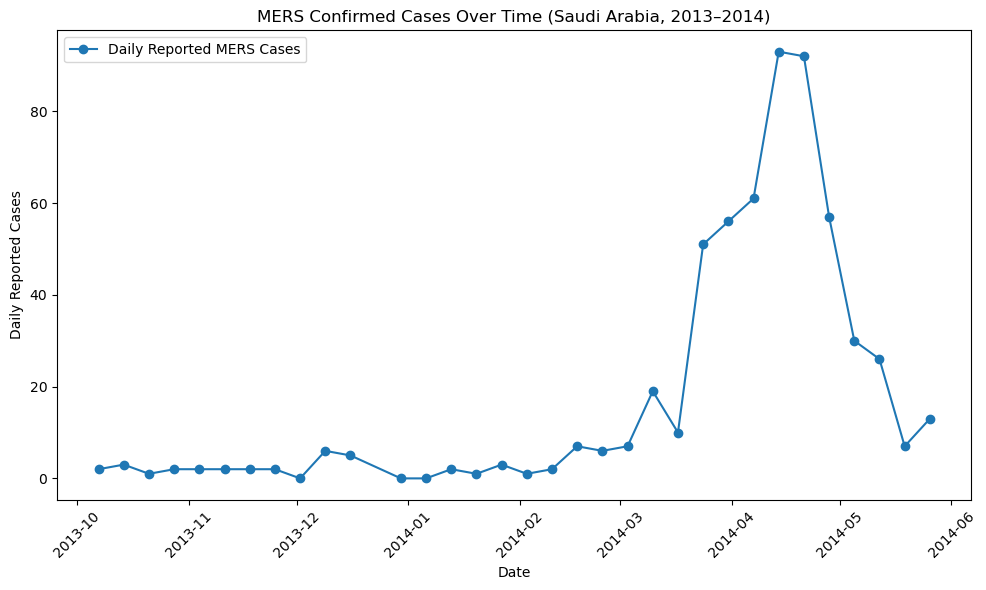

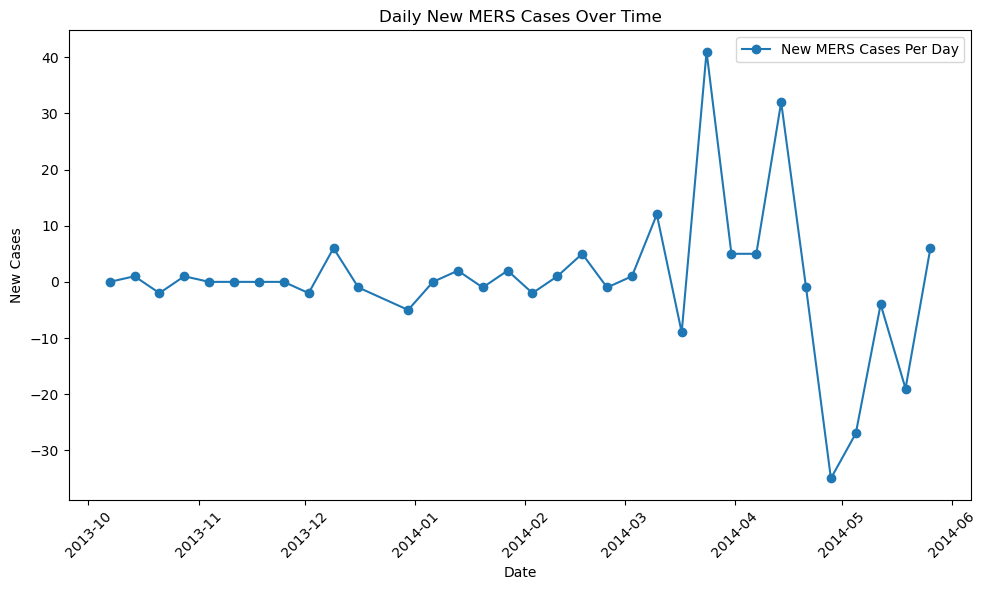

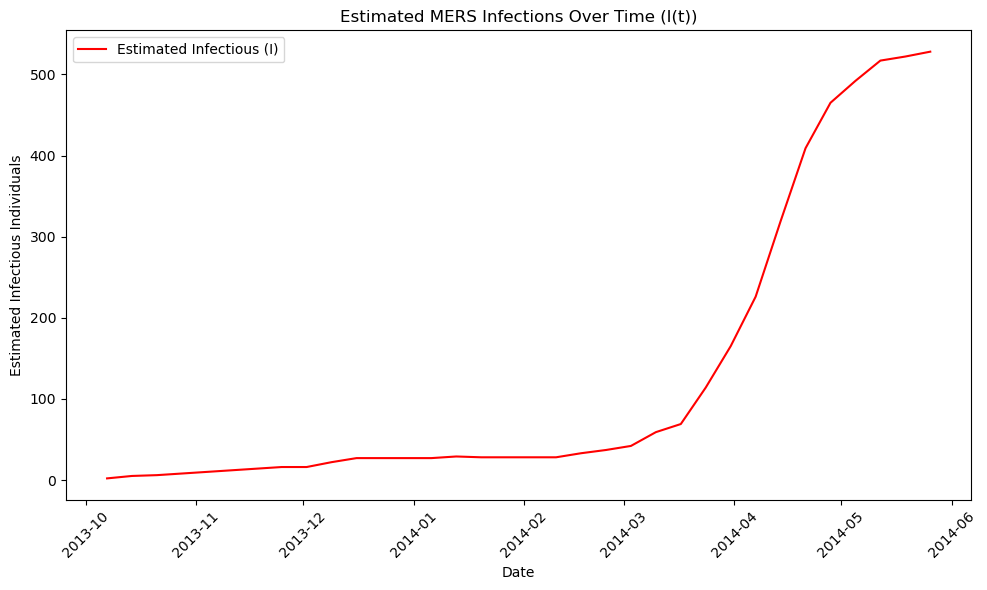

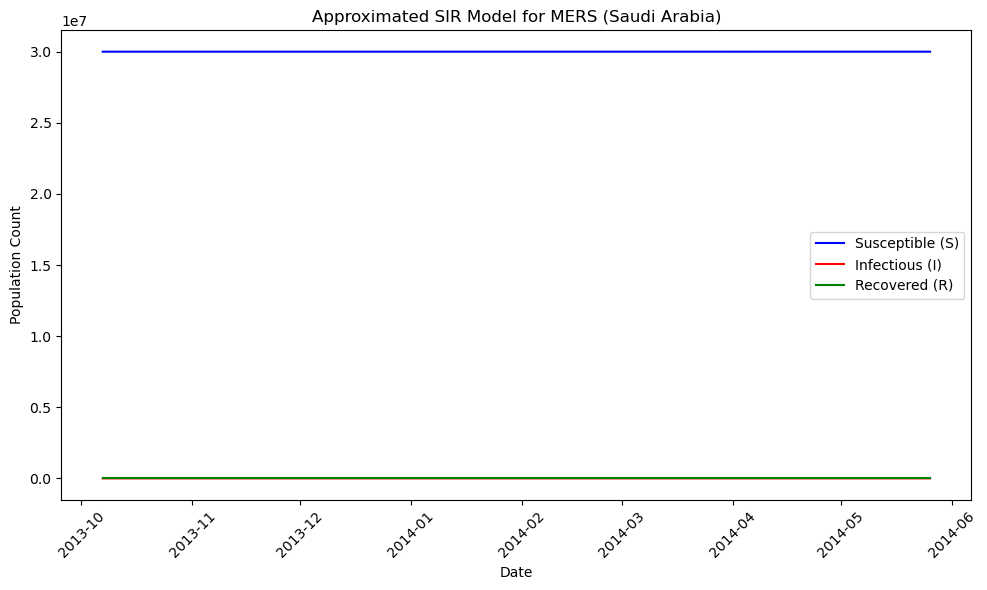

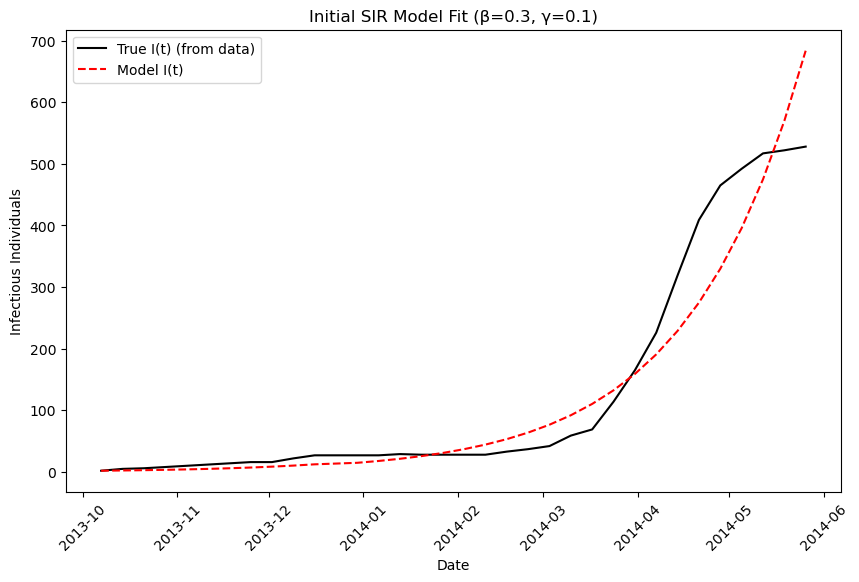

Optimal beta: 2.0
Optimal gamma: 1.7998542365660475
Full-data SSE: 90089.37777766612


In [ ]:
from main_functions import convert_cumulative_to_SIR
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Load the MERS dataset
data = pd.read_csv('MERS_Saudi_Arabia_data_2013_2014_new_cases.csv')
print(data.head())
print(data.columns)

# Ensure correct date format
data['date'] = pd.to_datetime(data['date'])

# Create cumulative case count (if raw new cases exist)
data['Cumulative_cases'] = data['confirmed_cases'].cumsum()

# Plot confirmed cases over time
plt.figure(figsize=(10, 6))
plt.plot(
    data['date'],
    data['confirmed_cases'],
    label='Daily Reported MERS Cases',
    marker="o"
)
plt.xlabel('Date')
plt.ylabel('Daily Reported Cases')
plt.title('MERS Confirmed Cases Over Time (Saudi Arabia, 2013–2014)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Compute new cases per day
data['new_cases'] = data['confirmed_cases'].diff().fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(
    data['date'],
    data['new_cases'],
    label='New MERS Cases Per Day',
    marker="o"
)
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Daily New MERS Cases Over Time')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Convert to SIR estimates
# Estimated Saudi Arabia population (~30 million around 2013–2014)
population = 30000000

data_sir = convert_cumulative_to_SIR(
    data,
    date_col='date',
    cumulative_col='Cumulative_cases',
    population=population,
    infectious_period=14,  # adjustable assumption
    new_case_col='new_cases',
    I_col='I_est',
    R_col='R_est',
    S_col='S_est'
)

# Plot infectious population estimate
plt.figure(figsize=(10, 6))
plt.plot(
    data_sir['date'],
    data_sir['I_est'],
    label='Estimated Infectious (I)',
    color='red'
)
plt.xlabel('Date')
plt.ylabel('Estimated Infectious Individuals')
plt.title('Estimated MERS Infections Over Time (I(t))')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot SIR curves
plt.figure(figsize=(10, 6))
plt.plot(
    data_sir['date'],
    data_sir['S_est'],
    label='Susceptible (S)',
    color='blue'
)
plt.plot(
    data_sir['date'],
    data_sir['I_est'],
    label='Infectious (I)',
    color='red'
)
plt.plot(
    data_sir['date'],
    data_sir['R_est'],
    label='Recovered (R)',
    color='green'
)
plt.xlabel('Date')
plt.ylabel('Population Count')
plt.title('Approximated SIR Model for MERS (Saudi Arabia)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Compare true and model I(t) using SSE
def euler_sir(beta, gamma, S0, I0, R0, t, N):
    """ Solve the SIR model using Euler's method.

    Parameters:
    - beta: Infection rate
    - gamma: Recovery rate
    - S0: Initial susceptible population
    - I0: Initial infected population
    - R0: Initial recovered population
    - t: Array of time points (days or weeks)
    - N: Total population

    Returns:
    - S: Array of susceptible population over time
    - I: Array of infected population over time
    - R: Array of recovered population over time
    """
    S = np.empty(len(t), float)
    I = np.empty(len(t), float)
    R = np.empty(len(t), float)

    # Initial conditions
    S[0], I[0], R[0] = S0, I0, R0

    for n in range(len(t) - 1):
        dt = t[n + 1] - t[n]

        # Differential equations for SIR model
        dS = -beta * S[n] * I[n] / N
        dI = beta * S[n] * I[n] / N - gamma * I[n]
        dR = gamma * I[n]

        # Euler update steps
        S[n + 1] = S[n] + dS * dt
        I[n + 1] = I[n] + dI * dt
        R[n + 1] = R[n] + dR * dt

    return S, I, R


# find true I(t)
true_I = data_sir['I_est'].values
dates = data_sir['date'].values
N = population  # Saudi population

# initial conditions
I0 = true_I[0]
R0 = 0
S0 = N - I0

# time array
t = np.arange(len(true_I))

# run model with gamma and beta guesses
beta_guess = 0.3
gamma_guess = 0.1
S_model, I_model, R_model = euler_sir(beta_guess, gamma_guess, S0, I0, R0, t, N)

# plot model I(t) vs. true I(t)
plt.figure(figsize=(10, 6))
plt.plot(dates, true_I, label="True I(t) (from data)", color="black")
plt.plot(dates, I_model, label="Model I(t)", color="red", linestyle="--")
plt.title(f"Initial SIR Model Fit (β={beta_guess}, γ={gamma_guess})")
plt.xlabel("Date")
plt.ylabel("Infectious Individuals")
plt.legend()
plt.xticks(rotation=45)
plt.show()


# SSE function
def SSE(model_I, true_I):
    return np.sum((model_I - true_I) ** 2)


# fit gamma and beta to minimize SSE
from scipy.optimize import minimize


def objective(params):
    beta, gamma = params
    _, I_temp, _ = euler_sir(beta, gamma, S0, I0, R0, t, N)
    return SSE(I_temp, true_I)


initial_guess = [3, 5]
result = minimize(objective, initial_guess, bounds=[(0, 2), (0, 2)])
beta_opt, gamma_opt = result.x

print("Optimal beta:", beta_opt)
print("Optimal gamma:", gamma_opt)

# After computing I_model from Euler on the full dataset:

def SSE(model_I, true_I):
    return np.sum((model_I - true_I)**2)

sse_full = SSE(I_model, true_I)
print("Full-data SSE:", sse_full)



### 2. 1/2 Train/Test Split

         date  confirmed_cases
0  2013-10-07                2
1  2013-10-14                3
2  2013-10-21                1
3  2013-10-28                2
4  2013-11-04                2
Index(['date', 'confirmed_cases'], dtype='object')


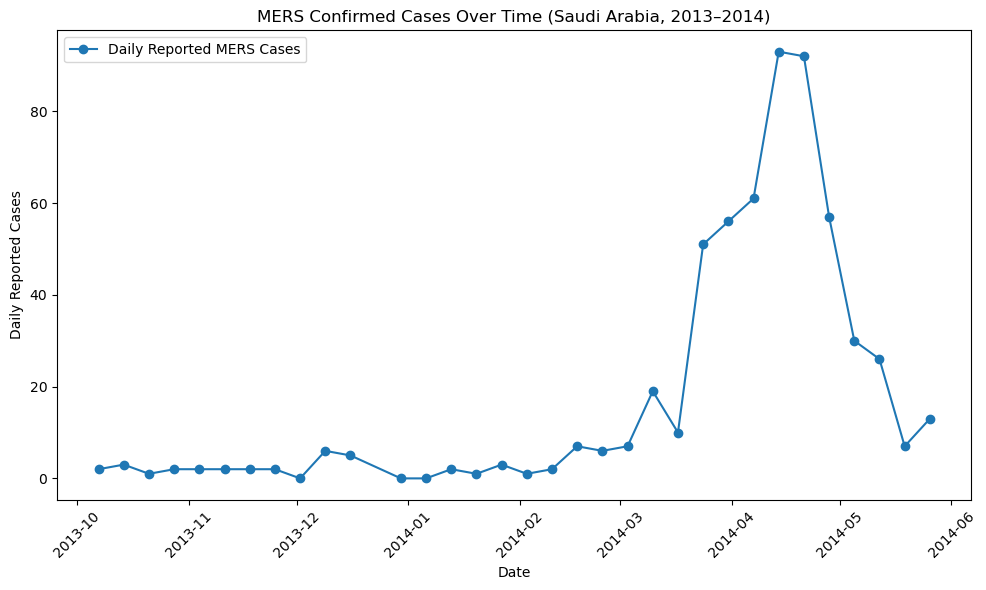

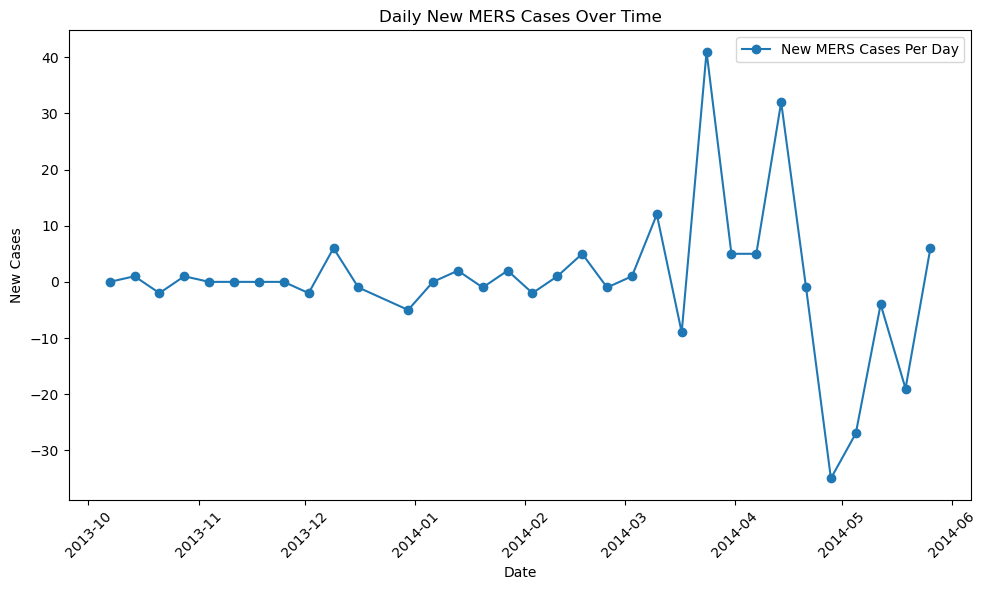

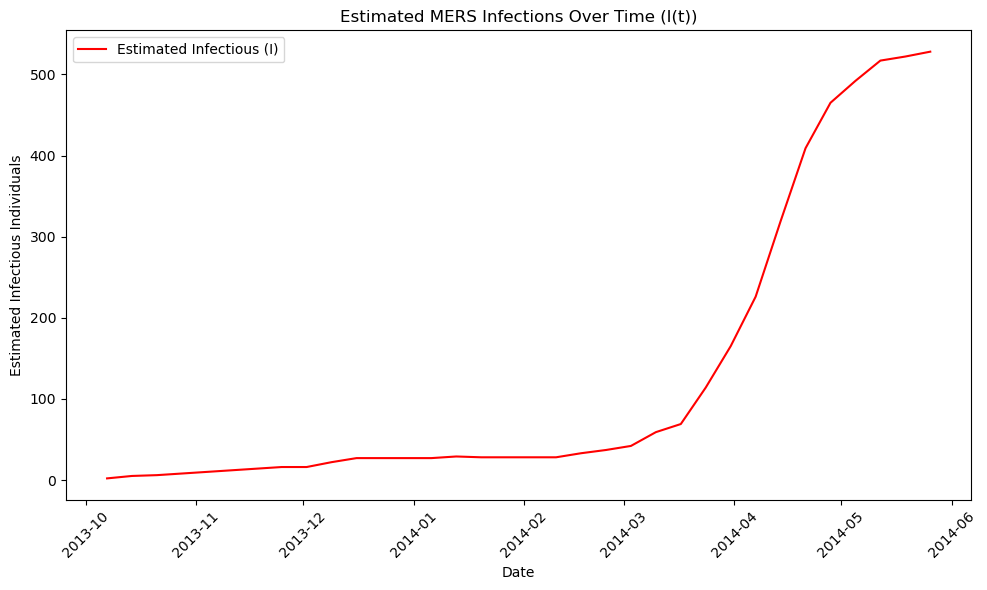

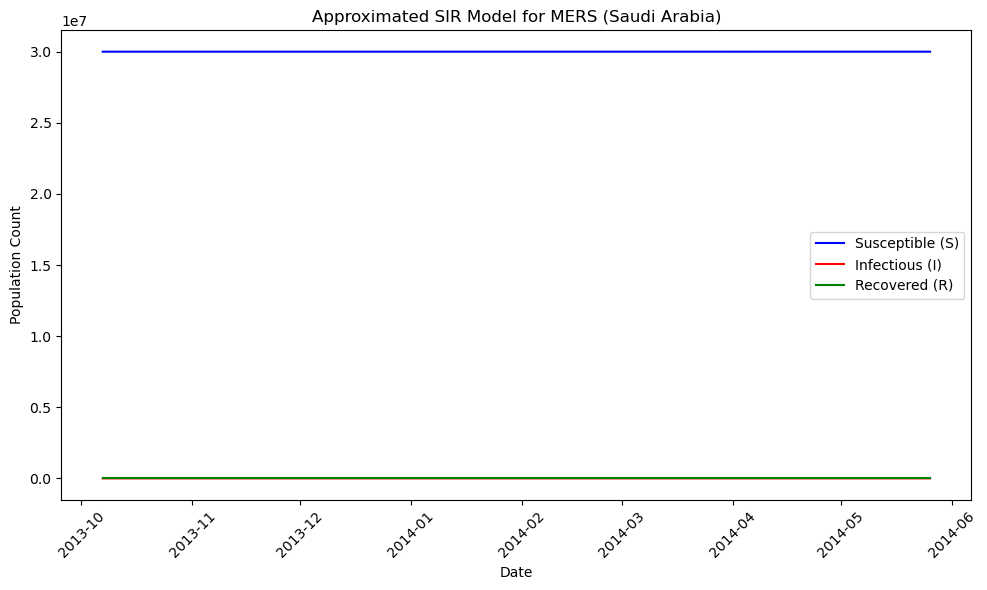

Optimal beta (train only): 2.0
Optimal gamma (train only): 1.7804042410853684


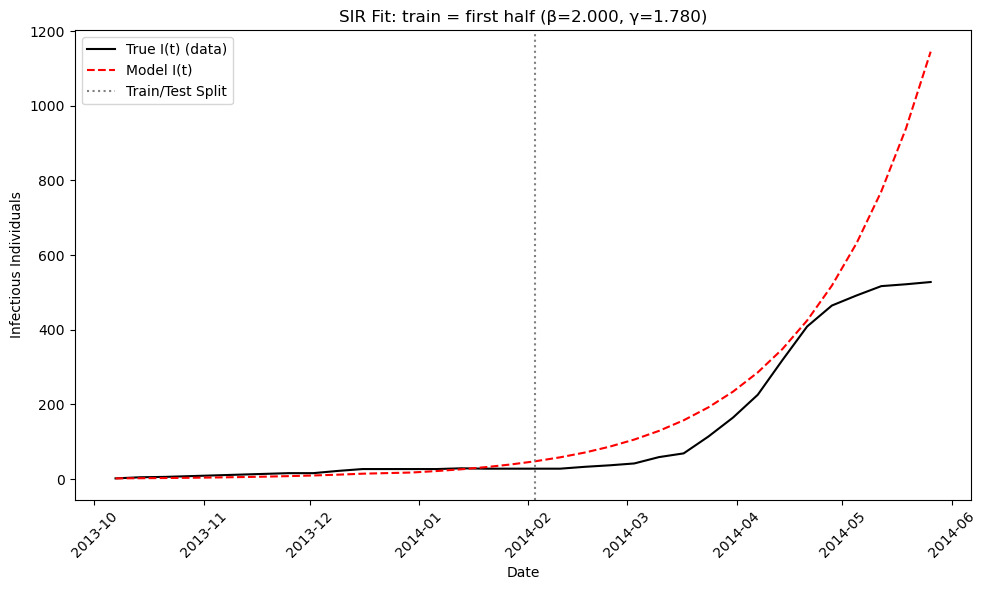

Train SSE (first half): 788.427015468611
Test SSE (second half, Euler error): 679393.5697174852


In [5]:
from main_functions import convert_cumulative_to_SIR
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Load the MERS dataset
data = pd.read_csv('MERS_Saudi_Arabia_data_2013_2014_new_cases.csv')

print(data.head())
print(data.columns)

# Ensure correct date format
data['date'] = pd.to_datetime(data['date'])

# Create cumulative case count (if raw new cases exist)
data['Cumulative_cases'] = data['confirmed_cases'].cumsum()

# Plot confirmed cases over time
plt.figure(figsize=(10, 6))
plt.plot(
    data['date'],
    data['confirmed_cases'],
    label='Daily Reported MERS Cases',
    marker="o"
)

plt.xlabel('Date')
plt.ylabel('Daily Reported Cases')
plt.title('MERS Confirmed Cases Over Time (Saudi Arabia, 2013–2014)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Compute new cases per day 
data['new_cases'] = data['confirmed_cases'].diff().fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(
    data['date'],
    data['new_cases'],
    label='New MERS Cases Per Day',
    marker="o"
)

plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Daily New MERS Cases Over Time')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Convert to SIR estimates
# Estimated Saudi Arabia population (~30 million around 2013–2014)
population = 30000000

data_sir = convert_cumulative_to_SIR(
    data,
    date_col='date',
    cumulative_col='Cumulative_cases',
    population=population,
    infectious_period=14,  # adjustable assumption
    new_case_col='new_cases',
    I_col='I_est',
    R_col='R_est',
    S_col='S_est'
)

# Plot infectious population estimate
plt.figure(figsize=(10, 6))
plt.plot(
    data_sir['date'],
    data_sir['I_est'],
    label='Estimated Infectious (I)',
    color='red'
)

plt.xlabel('Date')
plt.ylabel('Estimated Infectious Individuals')
plt.title('Estimated MERS Infections Over Time (I(t))')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot SIR curves
plt.figure(figsize=(10, 6))

plt.plot(data_sir['date'], data_sir['S_est'], label='Susceptible (S)', color='blue')
plt.plot(data_sir['date'], data_sir['I_est'], label='Infectious (I)', color='red')
plt.plot(data_sir['date'], data_sir['R_est'], label='Recovered (R)', color='green')

plt.xlabel('Date')
plt.ylabel('Population Count')
plt.title('Approximated SIR Model for MERS (Saudi Arabia)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Compare true and model I(t) using SSE

# Compare true and model I(t) using SSE

def euler_sir(beta, gamma, S0, I0, R0, t, N):
    """
    Solve the SIR model using Euler's method.
    """
    S = np.empty(len(t), float)
    I = np.empty(len(t), float)
    R = np.empty(len(t), float)

    # Initial conditions
    S[0], I[0], R[0] = S0, I0, R0

    for n in range(len(t) - 1):
        dt = t[n + 1] - t[n]

        # Differential equations for SIR model
        dS = -beta * S[n] * I[n] / N
        dI = beta * S[n] * I[n] / N - gamma * I[n]
        dR = gamma * I[n]

        # Euler update steps
        S[n + 1] = S[n] + dS * dt
        I[n + 1] = I[n] + dI * dt
        R[n + 1] = R[n] + dR * dt

    return S, I, R


# ---------- set up data & split into halves ----------

true_I = data_sir['I_est'].values
dates = data_sir['date'].values
N = population

# time array
t = np.arange(len(true_I))

n = len(true_I)
mid = n // 2  # index that splits first / second half

# first half = training
t_train = t[:mid]
I_train = true_I[:mid]
dates_train = dates[:mid]

# second half = testing
t_test = t[mid:]
I_test = true_I[mid:]
dates_test = dates[mid:]

# initial conditions based on first point in training data
I0 = I_train[0]
R0 = 0
S0 = N - I0


# ---------- SSE + fitting only on FIRST half ----------

def SSE(model_I, true_I_slice):
    return np.sum((model_I - true_I_slice) ** 2)

from scipy.optimize import minimize

def objective(params):
    beta, gamma = params
    _, I_temp, _ = euler_sir(beta, gamma, S0, I0, R0, t_train, N)
    return SSE(I_temp, I_train)

initial_guess = [5, 3]

result = minimize(objective, initial_guess, bounds=[(0, 2), (0, 2)])
beta_opt, gamma_opt = result.x

print("Optimal beta (train only):", beta_opt)
print("Optimal gamma (train only):", gamma_opt)


# ---------- run model on FULL time range with fitted params ----------

S_full, I_full, R_full = euler_sir(beta_opt, gamma_opt, S0, I0, R0, t, N)

# plot model vs true, with train/test split line
plt.figure(figsize=(10, 6))
plt.plot(dates, true_I, label="True I(t) (data)", color="black")
plt.plot(dates, I_full, label="Model I(t)", color="red", linestyle="--")
plt.axvline(dates[mid], color="gray", linestyle=":", label="Train/Test Split")

plt.title(f"SIR Fit: train = first half (β={beta_opt:.3f}, γ={gamma_opt:.3f})")
plt.xlabel("Date")
plt.ylabel("Infectious Individuals")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------- compute SSE on first and second halves ----------

sse_train = SSE(I_full[:mid], I_train)
sse_test  = SSE(I_full[mid:], I_test)

print("Train SSE (first half):", sse_train)
print("Test SSE (second half, Euler error):", sse_test)

sse_test_euler = sse_test  # save for comparison with RK4 later

### Using RK4 Method

RK4 beta train only: 2.0
RK4 gamma train only: 1.8014782540813967


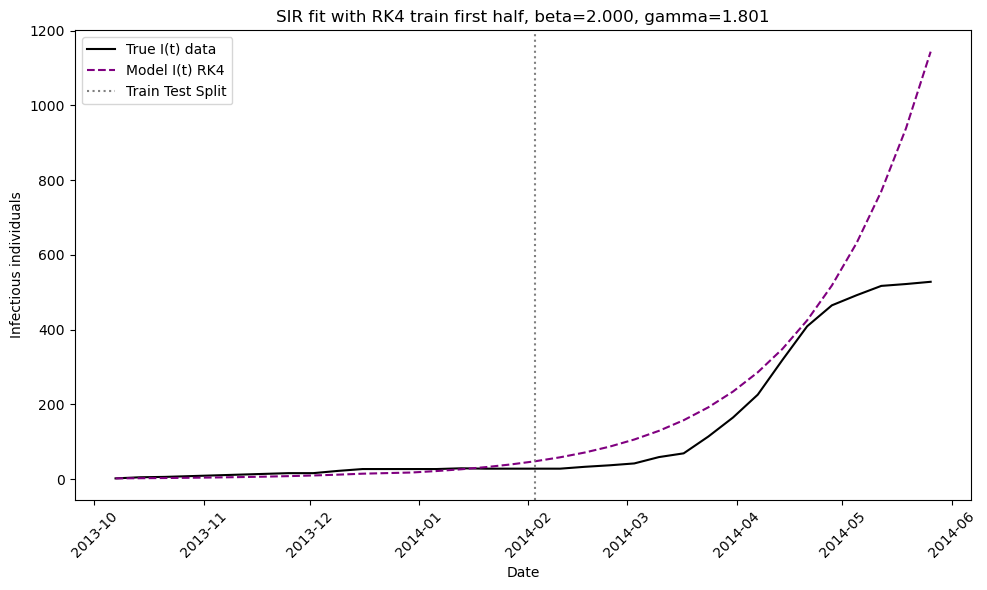

Train SSE RK4 first half: 788.4061654248368
Test SSE RK4 second half: 676477.9500418671
Train RMSE RK4 first half: 7.019642821330178
Test RMSE RK4 second half: 199.48137905754027
Euler test SSE second half: 679393.5697174852
RK4   test SSE second half: 676477.9500418671


In [6]:
from scipy.integrate import solve_ivp

def sir_rhs(t, y, beta, gamma, N):
    # Right hand side for SIR ODEs
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

def sir_solve_ivp(beta, gamma, S0, I0, R0, t, N):
    # Solve SIR using solve_ivp with RK45
    y0 = [S0, I0, R0]
    t_span = (t[0], t[-1])

    sol = solve_ivp(
        fun=lambda tau, y: sir_rhs(tau, y, beta, gamma, N),
        t_span=t_span,
        y0=y0,
        t_eval=t,
        method="RK45",
        rtol=1e-6,
        atol=1e-9
    )

    S = sol.y[0]
    I = sol.y[1]
    R = sol.y[2]
    return S, I, R

def objective_rk(params):
    # Objective for fitting beta and gamma on first half using RK4
    beta, gamma = params
    _, I_temp, _ = sir_solve_ivp(beta, gamma, S0, I0, R0, t_train, N)
    return SSE(I_temp, I_train)

initial_guess_rk = [5, 3]

result_rk = minimize(objective_rk, initial_guess_rk, bounds=[(0, 2), (0, 2)])
beta_rk, gamma_rk = result_rk.x

print("RK4 beta train only:", beta_rk)
print("RK4 gamma train only:", gamma_rk)

# Simulate over full time range with RK4 fit
S_rk_full, I_rk_full, R_rk_full = sir_solve_ivp(beta_rk, gamma_rk, S0, I0, R0, t, N)

plt.figure(figsize=(10, 6))
plt.plot(dates, true_I, label="True I(t) data", color="black")
plt.plot(dates, I_rk_full, label="Model I(t) RK4", color="purple", linestyle="--")
plt.axvline(dates[mid], color="gray", linestyle=":", label="Train Test Split")
plt.title(f"SIR fit with RK4 train first half, beta={beta_rk:.3f}, gamma={gamma_rk:.3f}")
plt.xlabel("Date")
plt.ylabel("Infectious individuals")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# SSE on first and second halves for RK4
sse_train_rk = SSE(I_rk_full[:mid], I_train)
sse_test_rk = SSE(I_rk_full[mid:], I_test)

rmse_train_rk = np.sqrt(sse_train_rk / len(I_train))
rmse_test_rk = np.sqrt(sse_test_rk / len(I_test))

print("Train SSE RK4 first half:", sse_train_rk)
print("Test SSE RK4 second half:", sse_test_rk)
print("Train RMSE RK4 first half:", rmse_train_rk)
print("Test RMSE RK4 second half:", rmse_test_rk)

# Compare RK4 with Euler on second half
print("Euler test SSE second half:", sse_test_euler)
print("RK4   test SSE second half:", sse_test_rk)


## Extending the SIR model

EXT beta1 (more infectious): 2.0
EXT beta2 (less infectious): 0.0
EXT gamma: 0.00013762514126407064
EXT p: 0.0
beta1 > beta2 ? True
Train SSE EXT: 64.98404843029954
Test SSE EXT: 1227599.4098615828
Train RMSE EXT: 2.015317103309978
Test RMSE EXT: 268.7224032191172

Compare test SSE:
Baseline SIR test SSE: 676477.9500418671
Extended  test SSE: 1227599.4098615828


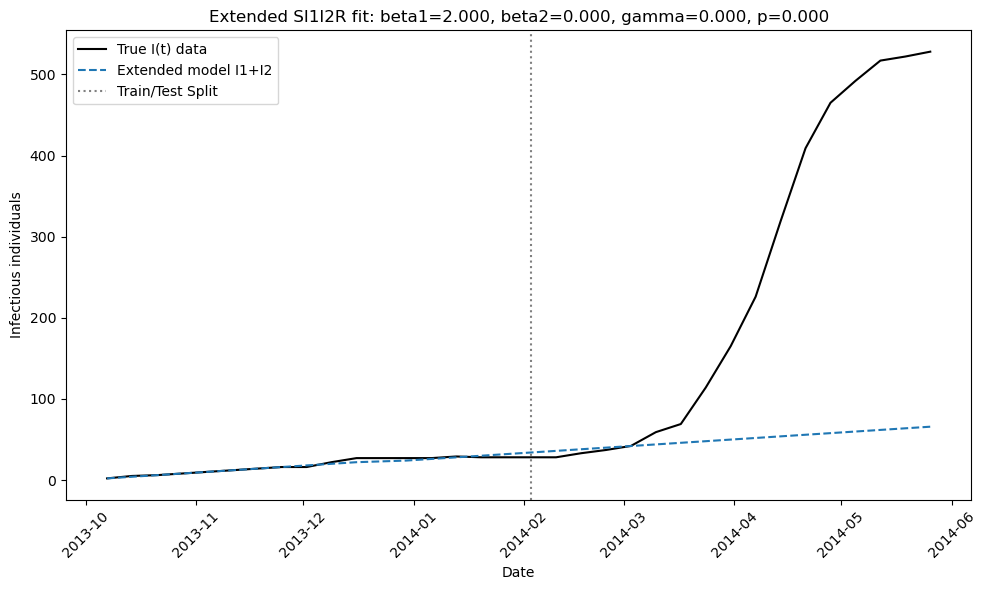

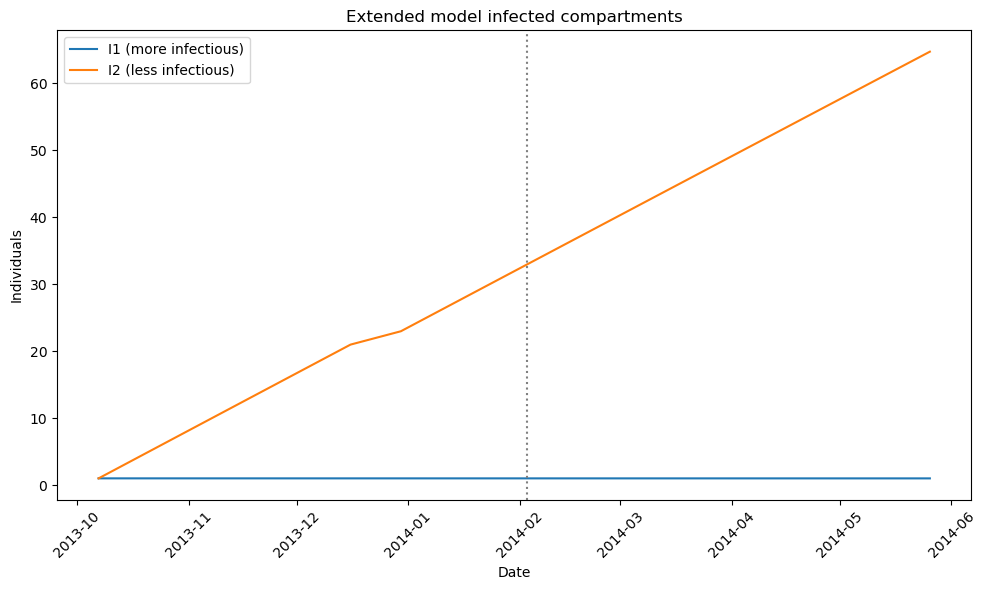

In [7]:
from scipy.integrate import solve_ivp

# -------- Extended model RHS: S, I1, I2, R --------
def si1i2r_rhs(t, y, beta1, beta2, gamma, p, N):
    S, I1, I2, R = y

    # force of infection uses both infected groups
    new_inf = (beta1 * I1 + beta2 * I2) * S / N

    dS  = -new_inf
    dI1 =  p * new_inf - gamma * I1
    dI2 = (1 - p) * new_inf - gamma * I2
    dR  = gamma * (I1 + I2)

    return [dS, dI1, dI2, dR]

def si1i2r_solve_ivp(beta1, beta2, gamma, p, S0, I10, I20, R0, t, N):
    y0 = [S0, I10, I20, R0]
    t_span = (t[0], t[-1])

    sol = solve_ivp(
        fun=lambda tau, y: si1i2r_rhs(tau, y, beta1, beta2, gamma, p, N),
        t_span=t_span,
        y0=y0,
        t_eval=t,
        method="RK45",
        rtol=1e-6,
        atol=1e-9
    )

    S  = sol.y[0]
    I1 = sol.y[1]
    I2 = sol.y[2]
    R  = sol.y[3]
    I_total = I1 + I2
    return S, I1, I2, I_total, R

# -------- Objective: fit on first half --------
# split initial I0 into two groups (simple: 50/50)
I10 = 0.5 * I0
I20 = 0.5 * I0

def objective_ext(params):
    beta1, beta2, gamma, p = params

    # enforce beta1 >= beta2 (Saudi-like more infectious group vs less infectious group)
    penalty = 0.0
    if beta1 < beta2:
        penalty += 1e9 * (beta2 - beta1)**2

    _, _, _, I_temp, _ = si1i2r_solve_ivp(beta1, beta2, gamma, p, S0, I10, I20, R0, t_train, N)
    return SSE(I_temp, I_train) + penalty

init_guess = [1.0, 0.3, 0.2, 0.5]  # beta1, beta2, gamma, p
bounds = [(0, 2), (0, 2), (0, 2), (0, 1)]

res_ext = minimize(objective_ext, init_guess, bounds=bounds)
beta1_fit, beta2_fit, gamma_fit, p_fit = res_ext.x

print("EXT beta1 (more infectious):", beta1_fit)
print("EXT beta2 (less infectious):", beta2_fit)
print("EXT gamma:", gamma_fit)
print("EXT p:", p_fit)
print("beta1 > beta2 ?", beta1_fit > beta2_fit)

# -------- Simulate full with fitted params --------
S_ext, I1_ext, I2_ext, I_ext_full, R_ext = si1i2r_solve_ivp(
    beta1_fit, beta2_fit, gamma_fit, p_fit, S0, I10, I20, R0, t, N
)

# -------- SSE train/test --------
sse_train_ext = SSE(I_ext_full[:mid], I_train)
sse_test_ext  = SSE(I_ext_full[mid:],  I_test)

rmse_train_ext = np.sqrt(sse_train_ext / len(I_train))
rmse_test_ext  = np.sqrt(sse_test_ext  / len(I_test))

print("Train SSE EXT:", sse_train_ext)
print("Test SSE EXT:", sse_test_ext)
print("Train RMSE EXT:", rmse_train_ext)
print("Test RMSE EXT:", rmse_test_ext)

print("\nCompare test SSE:")
print("Baseline SIR test SSE:", sse_test_rk)   # from your Step 5 RK45 SIR
print("Extended  test SSE:", sse_test_ext)

# -------- Plot (total I + optional I1/I2 breakdown) --------
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(dates, true_I, label="True I(t) data", color="black")
plt.plot(dates, I_ext_full, label="Extended model I1+I2", linestyle="--")
plt.axvline(dates[mid], color="gray", linestyle=":", label="Train/Test Split")
plt.title(f"Extended SI1I2R fit: beta1={beta1_fit:.3f}, beta2={beta2_fit:.3f}, gamma={gamma_fit:.3f}, p={p_fit:.3f}")
plt.xlabel("Date")
plt.ylabel("Infectious individuals")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: show the two infected groups separately
plt.figure(figsize=(10, 6))
plt.plot(dates, I1_ext, label="I1 (more infectious)")
plt.plot(dates, I2_ext, label="I2 (less infectious)")
plt.axvline(dates[mid], color="gray", linestyle=":")
plt.title("Extended model infected compartments")
plt.xlabel("Date")
plt.ylabel("Individuals")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Verify and validate your analysis: 

Our initial model was tested on the entire dataset, and we found the SSE to be around 90089.38, using optimized beta and gamma of 5, and 3, respectively. When training the model again on only the second half of the data, we found an SSE of 788.41 which was be expected since it was trained well on a small amount of data. However, when we used this selection to predict the second half, our SSE exploded, resulting in a score of 679393.57, almost 7 times higher than the entire dataset run. This was expected as our original model was using the entire dataset while the 1/2 model was trying to predict the second half. The midpoint method samples the slope halfway through each step, which better represents the actual average slope. Therefore, each update is more accurate in our SIR model.

The RK4 SSE was slightly better than the Euler method, therefore we can use it to optimize our SIR model.

*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*


## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*


## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*


## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*


## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*
